In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import display
from spacy import displacy

In [2]:
# Read dataset
data = pd.read_csv('2017-2020 data csv.csv', encoding='iso-8859-1')
data.rename(columns={'ï»¿Date':'Date'},inplace=True)
data.drop(columns=['Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
data['Date'] =pd.to_datetime(data.Date)
data.sort_values(by='Date',ascending=False,inplace=True)
data.reset_index(drop=True,inplace=True)
data

,Date,Target,Description,Attack,Target Class,Attack Class,Country
0,2020-12-31,Multinational engineering company headquartere...,A multinational engineering company headquarte...,Business Email Compromise,M Professional scientific and technical activi...,Cyber Crime,IN
1,2020-12-31,New York City Department of Education (NYC DoE),The New York City Department of Education reve...,Malware,"O Public administration and defence, compulsor...",Cyber Crime,US
2,2020-12-31,Apex Laboratory,"Apex Laboratory discloses a ransomware attack,...",Malware,Q Human health and social work activities,Cyber Crime,US
3,2020-12-31,Mattapan Community Health Center (MCHC),Mattapan Community Health Center (MCHC) provid...,Account hijacking,Q Human health and social work activities,Cyber Crime,US
4,2020-12-31,Prestera Center for Mental Health Services,Prestera Center for Mental Health Services pro...,Account hijacking,Q Human health and social work activities,Cyber Crime,US
...,...,...,...,...,...,...,...
6341,2017-01-02,Point of Sale infrastructure un Brazil and oth...,Arbor Networks researchers reveal the details ...,PoS Malware,K Financial and insurance activities,CC,BR
6342,2017-01-01,fbi.gov,"Exploiting a vulnerability of Plone CMS, Cyber...",Plone CMS vulnerability,"O Public administration and defence, compulsor...",CC,US
6343,2017-01-01,Several Institutions in the British Government,The British National Cyber Security Centre rev...,>1,"O Public administration and defence, compulsor...",CE,GB
6344,2017-01-01,Susan M. Hughes Center (hughescenter.net),The Susan M. Hughes Center notifies a ransomwa...,Malware,Q Human health and social work activities,CC,US


In [76]:
# Clean and combine duplicates

data['Target'].replace({'Multiple targets': 'Multiple Targets'},inplace=True)
data['Target'].replace({'Android users': 'Android Users'},inplace=True)
data['Target'].replace({'SIngle individuals': 'Single Individuals'},inplace=True)
data['Target'].replace({'SIngle Individuals': 'Single Individuals'},inplace=True)
data['Target'].replace({'Single individuals': 'Single Individuals'},inplace=True)
data['Target'].replace({'Facebook users': 'Facebook Users'},inplace=True)
data['Target'].replace({'Chrome users': 'Chrome Users'},inplace=True)
data['Target'].replace({'Multiple organizations': 'Multiple Organizations'},inplace=True)

data['Attack'].replace({'Malware/PoS Malware': 'Malware'},inplace=True)
data['Attack'].replace({'Account hijacking': 'Account Hijacking'},inplace=True)

data['Attack Class'].replace({'CC': 'Cyber Crime'},inplace=True)
data['Attack Class'].replace({'H': 'Hacktivism'},inplace=True)
data['Attack Class'].replace({'CW': 'Cyber Warfare'},inplace=True)
data['Attack Class'].replace({'CE': 'Cyber Spying'},inplace=True)
data.drop(data[data['Attack Class']=='>1'].index, inplace=True)
data.drop(data[data['Attack Class']=='CC/CE'].index, inplace=True)
data.drop(data[data['Attack Class']=='CW?'].index, inplace=True)
data.drop(data[data['Attack Class']=='US'].index, inplace=True)

data['Target Class'].replace({'O Public administration, defence, compulsory social security': 'O Admin, defence, social security'},inplace=True)
data['Target Class'].replace({'O Public administration and defence, compulsory social security': 'O Admin, defence, social security'},inplace=True)
data['Target Class'].replace({'Q Human health and social work activities': 'Q Health, social work'},inplace=True)
data['Target Class']=data['Target Class'].str[2:]



# Data Visualisation

In [77]:
# Attack frequency per day
df=pd.DataFrame({})
df['Occurences']=data['Date'].value_counts()
df['Date']=df.index
df.reset_index(drop=True,inplace=True)
df=df.sort_values(by='Date',ascending=False)
df

,Occurences,Date
560,5,2020-12-31
229,8,2020-12-30
344,7,2020-12-29
21,13,2020-12-28
783,3,2020-12-27
...,...,...
782,3,2017-01-06
781,3,2017-01-04
779,3,2017-01-03
1214,1,2017-01-02


In [78]:
# Create column to compute no. attacks monthly

# Created a new column DateMonth without the day
df['DateMonth']= df['Date'].apply(lambda x: x.strftime('%Y-%m'))

# Sum up all attack occurence monthly
df=df.groupby('DateMonth',as_index=False).sum() 
df.head()

,DateMonth,Occurences
0,2017-01,97
1,2017-02,65
2,2017-03,69
3,2017-04,82
4,2017-05,59


In [79]:
# Create 4 sub df for each year of attack count
df1=df.iloc[:12]
df2=df.iloc[12:24]
df3=df.iloc[24:36]
df4=df.iloc[-12:]

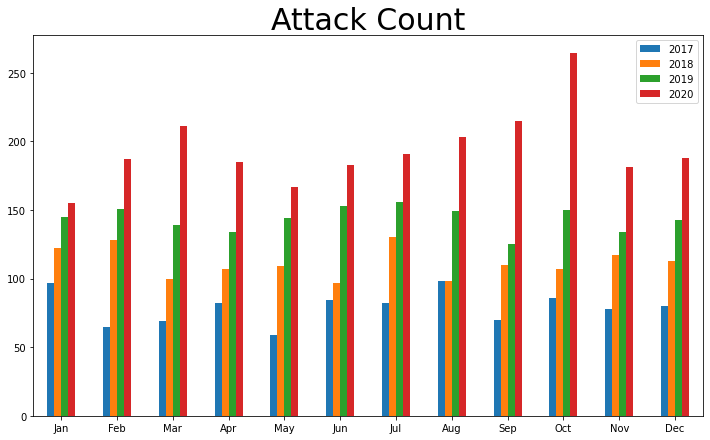

In [80]:
# Attack frequency for 2017-2020
index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bar=pd.DataFrame({'2017':df1['Occurences'].tolist(),
                  '2018':df2['Occurences'].tolist(),
                  '2019':df3['Occurences'].tolist(),
                  '2020':df4['Occurences'].tolist()
                   },index=index)

x=bar.plot(kind='bar',title='Attack Count',figsize=(12,7),rot=0)
x.title.set_size(30)

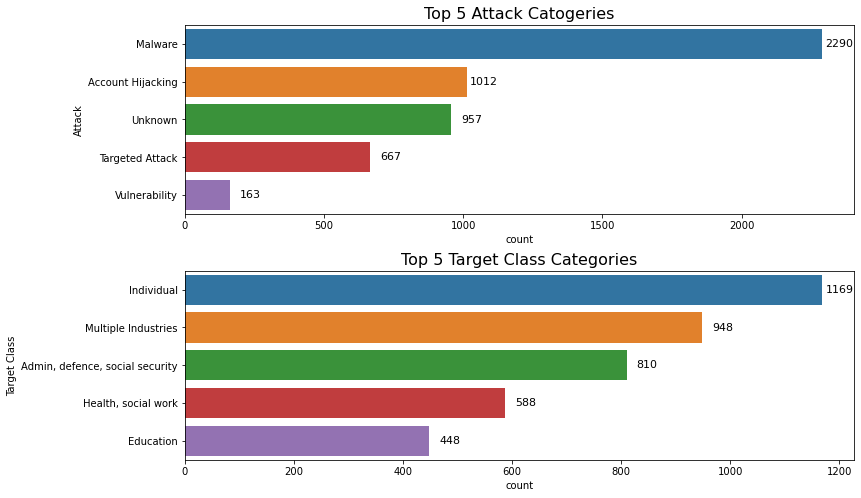

In [81]:
# Plot top 5 categories of attack and target class column

fig, (ax1,ax2)= plt.subplots(2,1,figsize=(12,8))
sb.countplot(y=data['Target Class'],order=data['Target Class'].value_counts().iloc[:5].index,ax=ax2)
sb.countplot(y=data['Attack'],order=data['Attack'].value_counts().iloc[:5].index,ax=ax1) 
ax1.set_title('Top 5 Attack Catogeries', fontsize=16)
ax2.set_title('Top 5 Target Class Categories', fontsize=16)
plt.subplots_adjust(hspace = 0.3)
for p in ax1.patches:
    ax1.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(31, -18),fontsize=11,textcoords='offset pixels', horizontalalignment='right')
for p in ax2.patches:
    ax2.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(31, -18),fontsize=11,textcoords='offset pixels', horizontalalignment='right')

In [82]:
# Process pie chart based on top 5 category and cumulate the minority

df1=data['Attack'].value_counts().iloc[:5]                         # Top 5 categories
otherValues=data['Attack'].value_counts().iloc[5:].sum()           # Sum up remaining categories
otherValuesSeries=pd.Series(data=otherValues,index=['All Others'])
df1=df1.append(otherValuesSeries)
df1

Malware              2290
Account Hijacking    1012
Unknown               957
Targeted Attack       667
Vulnerability         163
All Others           1251
dtype: int64

In [83]:
df2=data['Target Class'].value_counts().iloc[:5]                  # Top 5 categories
otherValues=data['Target Class'].value_counts().iloc[5:].sum()    # Sum up remaining categories
otherValuesSeries=pd.Series(data=otherValues,index=['All Others'])
df2=df2.append(otherValuesSeries)
df2

Individual                         1169
Multiple Industries                 948
Admin, defence, social security     810
Health, social work                 588
Education                           448
All Others                         2378
dtype: int64

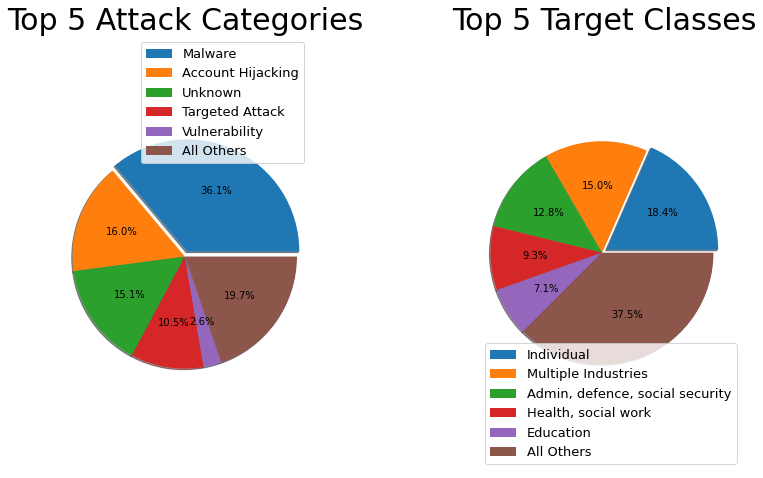

In [84]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,8))
explode=(0.1,0,0,0,0,0)

ax1.pie(df1,autopct='%1.1f%%',startangle=0, shadow = True,radius=2,explode=explode)
ax1.set_title('Top 5 Attack Categories',fontsize=30)
ax1.axis('equal')
ax1.legend(labels=df1.index,fontsize=13)
ax2.pie(df2,autopct='%1.1f%%',startangle=0, shadow = True,radius=2,explode=explode)
ax2.set_title('Top 5 Target Classes',fontsize=30)
ax2.axis('equal')
ax2.legend(labels=df2.index,fontsize=13)
plt.subplots_adjust(wspace = 0.67)

In [85]:
# Since malware is the most dominant category and individuals are the most common victims, we can find out what 
# malware is targeting

In [86]:
df4=data[['Attack','Target Class']]
df4=df4.loc[df4['Attack']=='Malware']
df4

,Attack,Target Class
1,Malware,"Admin, defence, social security"
2,Malware,"Health, social work"
5,Malware,"Health, social work"
7,Malware,Wholesale and retail trade
9,Malware,"Health, social work"
...,...,...
6322,Malware,"Admin, defence, social security"
6330,Malware,Individual
6331,Malware,"Health, social work"
6332,Malware,Individual


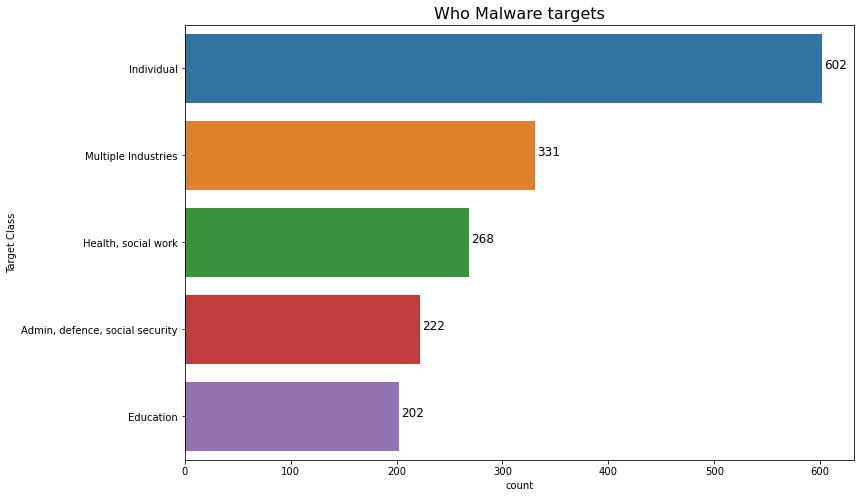

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.countplot(y=df4['Target Class'],order=df4['Target Class'].value_counts().iloc[:5].index)
ax.set_title('Who Malware targets', fontsize=16)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(25, -35),fontsize=12,textcoords='offset points',horizontalalignment='right')

In [88]:
# Pie chart processing for malware targets

df5=df4['Target Class'].value_counts().iloc[:5]                    # Top 5 categories
otherValues=df4['Target Class'].value_counts().iloc[5:].sum()      # Sum up remaining categories
otherValuesSeries=pd.Series(data=otherValues,index=['All Others'])
df5=df5.append(otherValuesSeries)
df5

Individual                         602
Multiple Industries                331
Health, social work                268
Admin, defence, social security    222
Education                          202
All Others                         665
dtype: int64

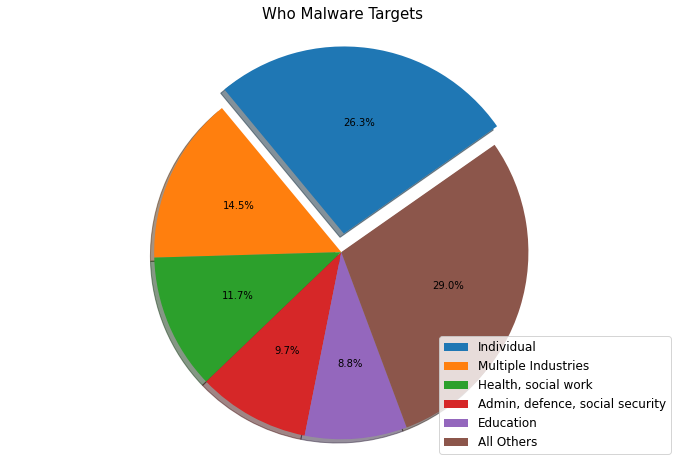

In [89]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(df5,autopct='%1.1f%%',startangle=35, shadow = True,explode=explode)
ax.set_title('Who Malware Targets',size=15)
ax.axis('equal')
ax.legend(labels=df5.index,fontsize=12)

In [90]:
# Since individuals are the most common victims in general and within malware targets, we can find out more on individuals

In [91]:
df6=data[['Attack','Target Class', 'Target']]
df6=df6.loc[df6['Attack']=='Malware']
df6=df6.loc[df6['Target Class']=='Individual']
df6

,Attack,Target Class,Target
50,Malware,Individual,Single Individuals
91,Malware,Individual,Single Individuals
92,Malware,Individual,Cyberpunk 2077 players
93,Malware,Individual,"Chinese speaking countries, Korea, and Japan"
160,Malware,Individual,Portuguese users
...,...,...,...
6219,Malware,Individual,Macbook Users
6229,Malware,Individual,Single Individuals
6321,Malware,Individual,Google Chrome Users
6330,Malware,Individual,Single Individuals


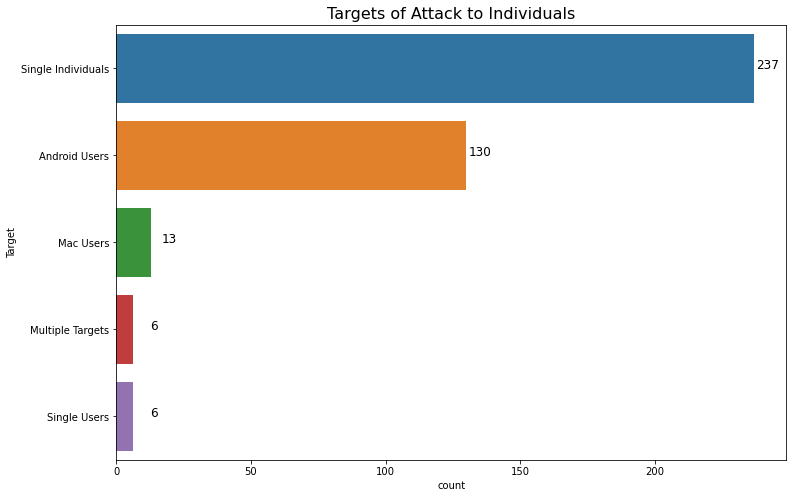

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.countplot(y=df6['Target'],order=df6['Target'].value_counts().iloc[:5].index)
ax.set_title('Targets of Attack to Individuals', fontsize=16)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(25, -35),fontsize=12,textcoords='offset points',horizontalalignment='right')

In [93]:
df7=df6['Target'].value_counts().iloc[:5]                         # Top 5 categories
otherValues=df6['Target'].value_counts().iloc[5:].sum()           # Sum up remaining categories
otherValuesSeries=pd.Series(data=otherValues,index=['All Others'])
df7=df7.append(otherValuesSeries)
df7

Single Individuals    237
Android Users         130
Mac Users              13
Multiple Targets        6
Single Users            6
All Others            210
dtype: int64

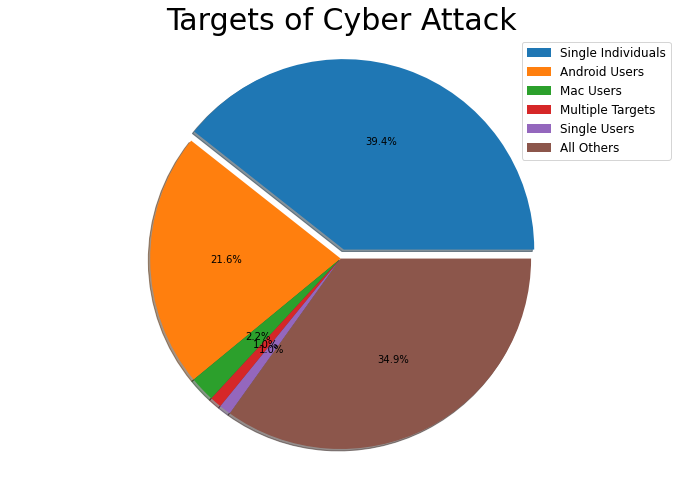

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(df7,autopct='%1.1f%%',radius=2,shadow=True,explode=explode)
ax.set_title('Targets of Cyber Attack',fontsize=30)
ax.axis('equal')
ax.legend(labels=df7.index,fontsize=12)